In [156]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import mplcursors
from sklearn.preprocessing import StandardScaler



In [110]:
df = pd.read_csv('./dataset/CarPrice_Assignment.csv')


In [111]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [112]:
df.nunique(axis=0)

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [113]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [114]:
non_numerical_cols = df.select_dtypes(exclude=['number'])
for col in non_numerical_cols:
    print(f"Column:{col} \nUnique values ={df[col].unique()}\n")

Column:CarName 
Unique values =['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'bu

# DATA VISUALIZATION

*FOR CATEGORICAL DATA*

In [115]:
def plot_car_models(data, title = "Car Models vs Frequence", x_col_name ='frequency', y_col_name='model' ): 
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, y=y_col_name, x=x_col_name, palette='pastel')

    plt.title(title)
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.tight_layout()
    plt.show()

In [116]:
def plot_bar_diagram(data, x_col, y_col):
    plt.figure(figsize=(5,4))
    ax = sns.barplot(data, x=x_col, y=y_col, palette="husl", hue=x_col, legend=False)
    # # ax = sns.catplot(data=data, kind='count', stat='count', x=col_name, height=4, aspect=2)

    # ax = sns.countplot(x=col_name, data=df, palette="husl", hue=col_name, legend=False)
    for container in ax.containers:
        ax.bar_label(container, color='black', size=10) 

    plt.title(f"{x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_265487/896292020.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




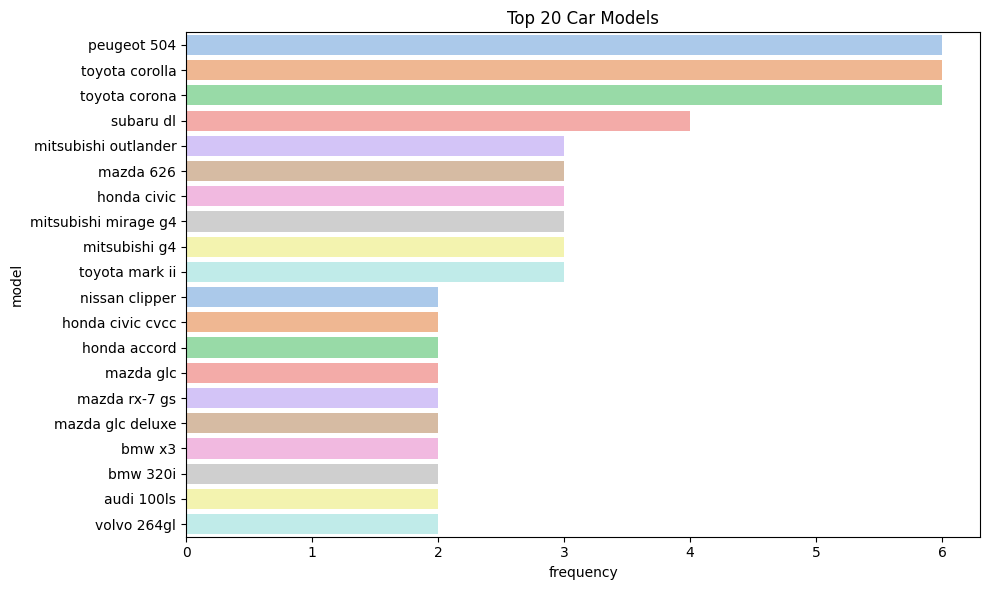

/tmp/ipykernel_265487/896292020.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




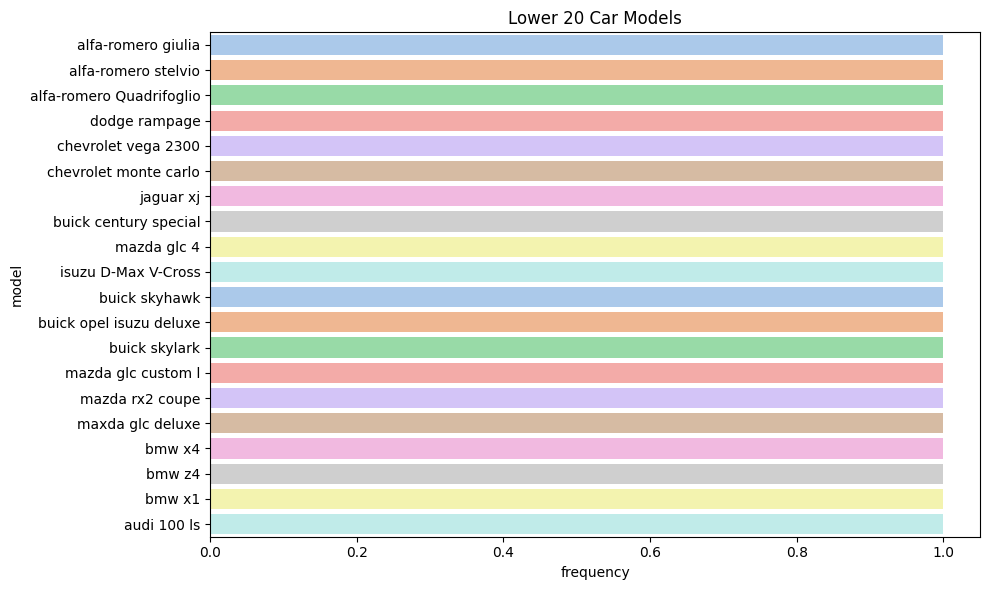

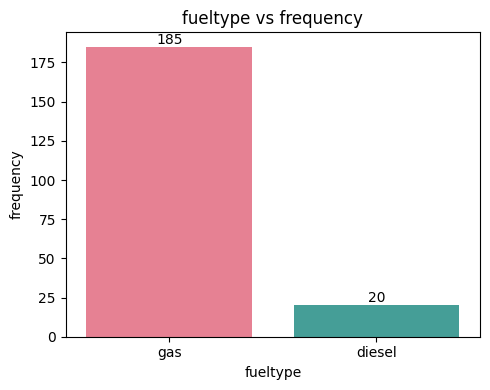

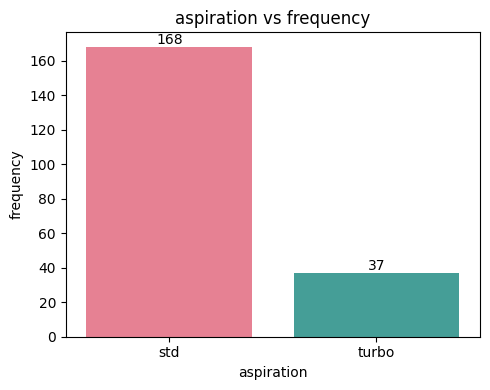

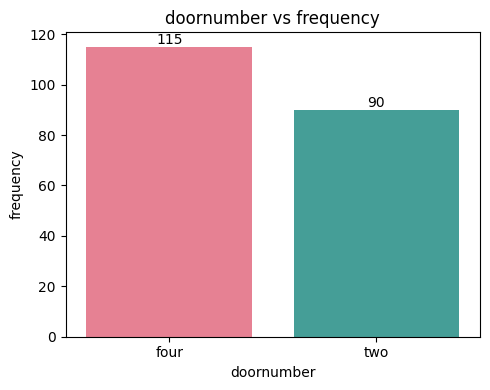

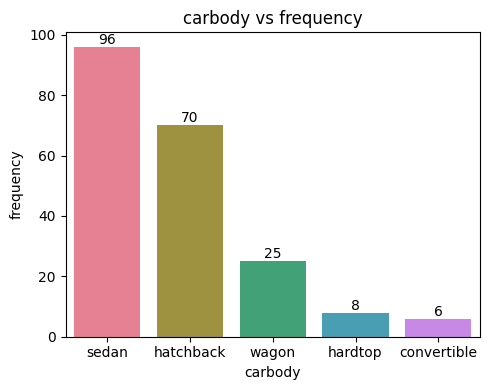

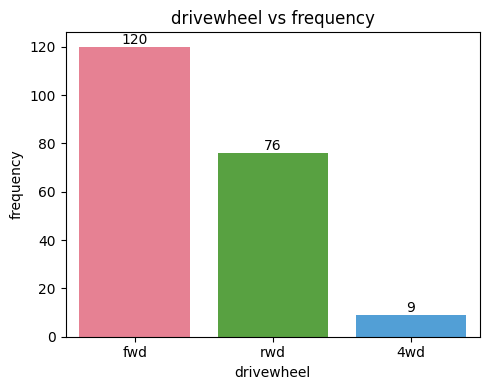

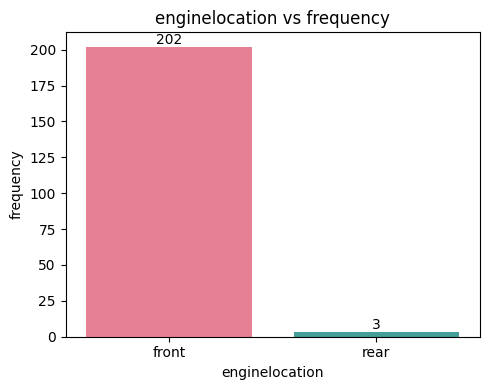

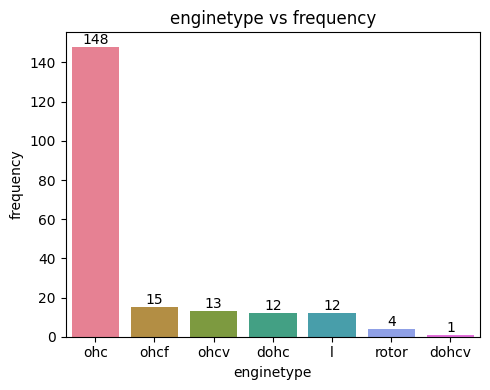

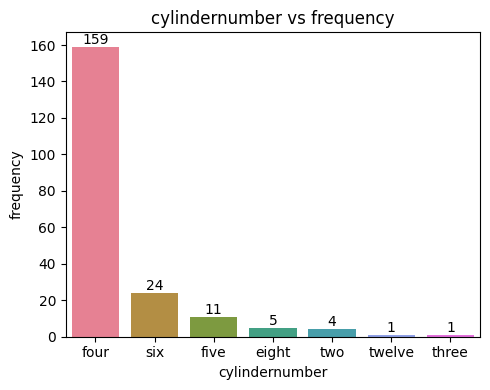

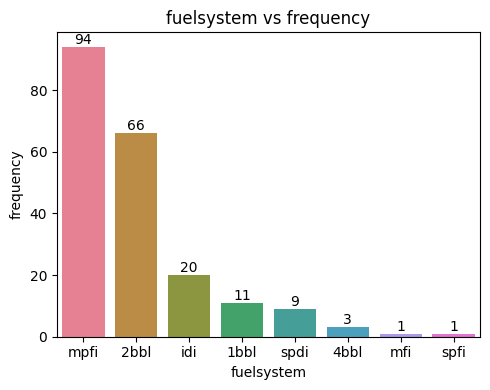

In [117]:
for col in non_numerical_cols: 
    if col == 'CarName':
        n = 20  # Number of top car models to plot
        
        car_models = df[col].value_counts().reset_index()
        car_models.columns = ['model', 'frequency']
        highest_freq = car_models.sort_values(by='frequency', ascending=False).head(n)
        lowest_freq = car_models.sort_values(by='frequency', ascending=True).head(n)

        plot_car_models(data=highest_freq, title=f"Top {n} Car Models") 
        plot_car_models(data=lowest_freq, title=f"Lower {n} Car Models") 
    
    else: 
        data = df[col].value_counts().reset_index()
        data.columns = [col, "frequency"]
        plot_bar_diagram(data=data, x_col=col, y_col="frequency")

*FOR NUMERICAL DATA*

In [118]:

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols 


Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [119]:
remove_columns = ['car_ID', 'symboling']
numerical_cols = numerical_cols.difference(remove_columns, sort=False)
numerical_cols


Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

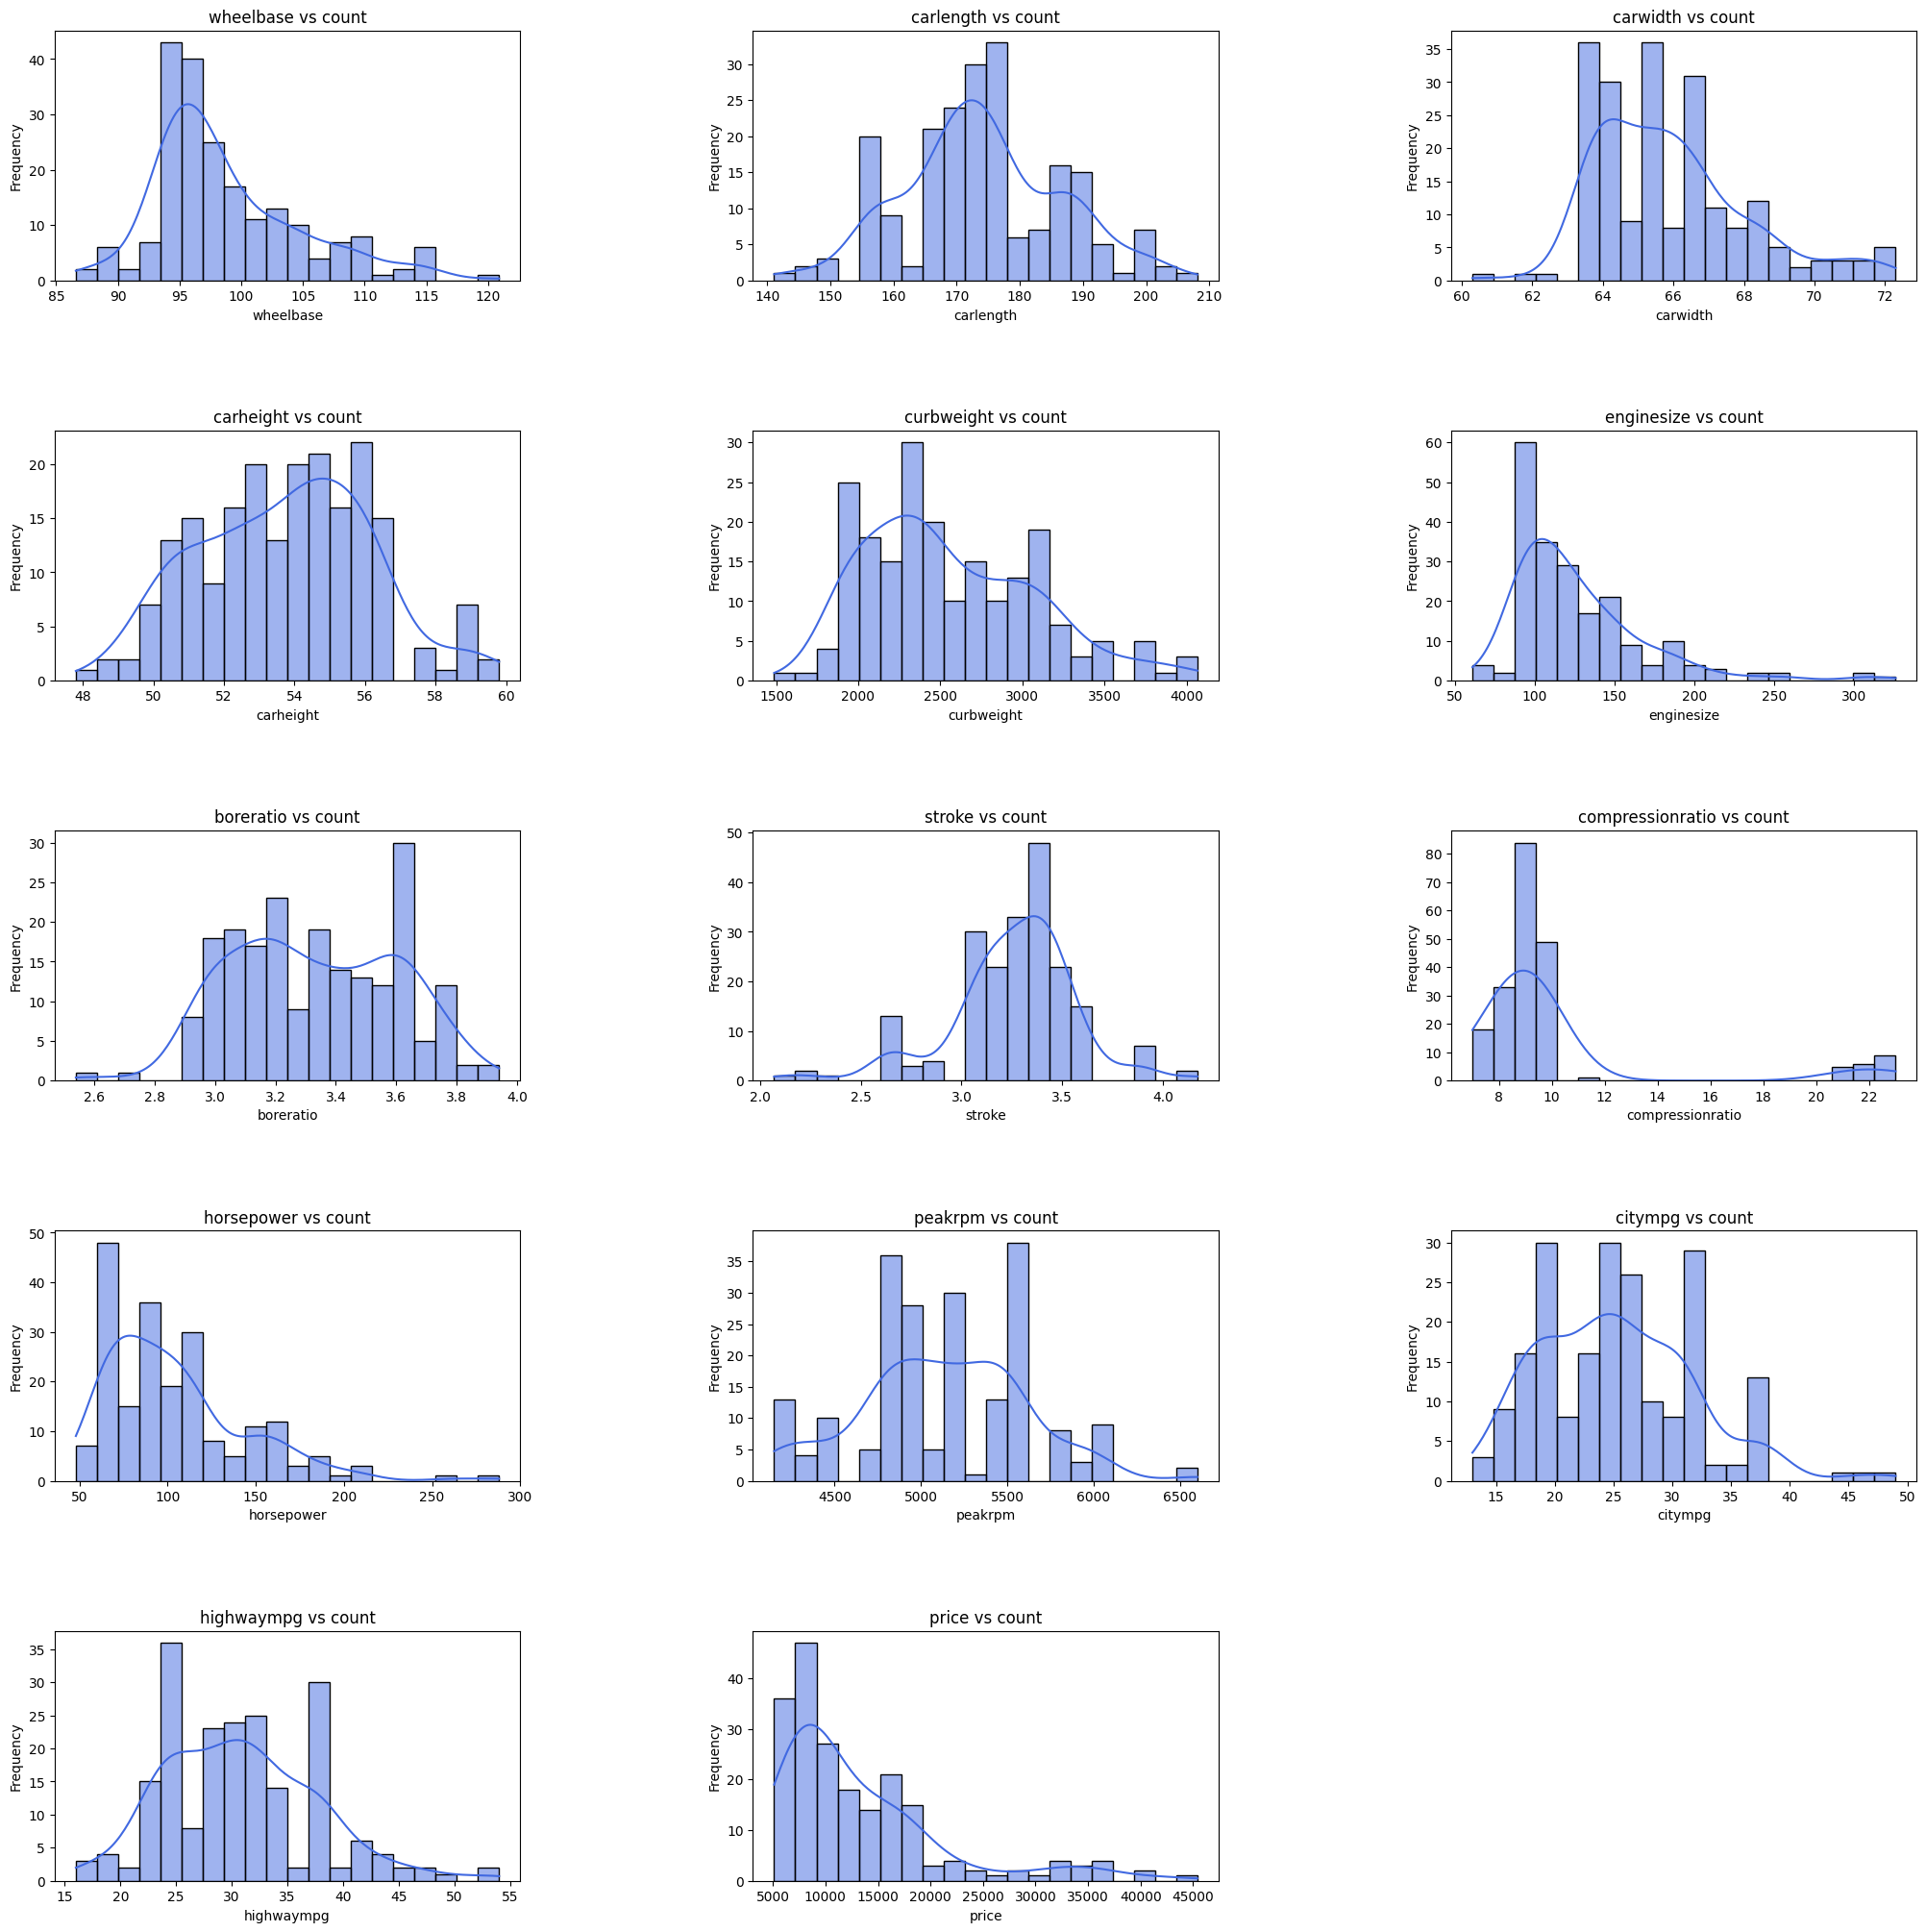

In [120]:
# Grid settings
n_cols = 3  # number of columns in grid

n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols,  figsize= (25, 25))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='royalblue', stat='count', bins=20)
    # for container in axes[i].containers:
    #     axes[i].bar_label(container, color='black', size=10) 
    axes[i].set_title(f"{col} vs count")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


plt.subplots_adjust(
    hspace=0.6,  # vertical space
    wspace= 0.5  # horizontal space
)

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])


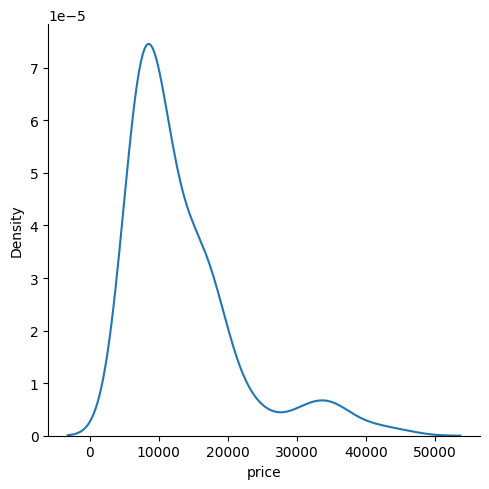

In [121]:
prices = df['price']
sns.displot(prices , kind="kde")


**Comparision with price**

In [122]:
unique_car_models = df['CarName'].unique()
print(df['CarName'].shape, unique_car_models.shape)

(205,) (147,)


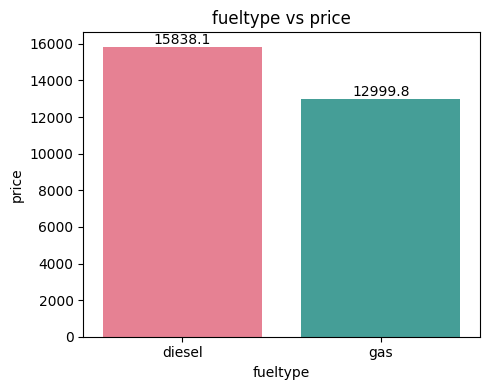

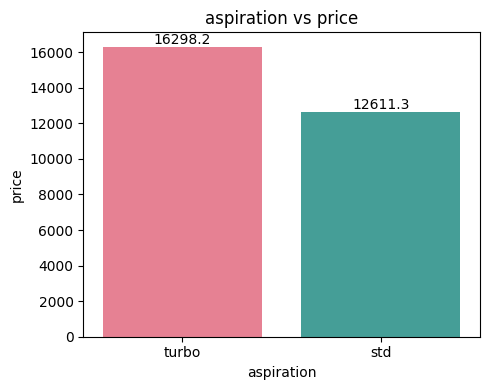

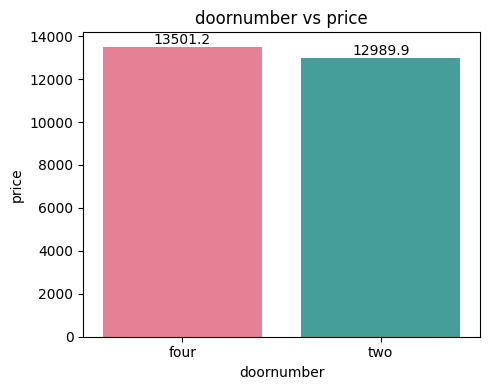

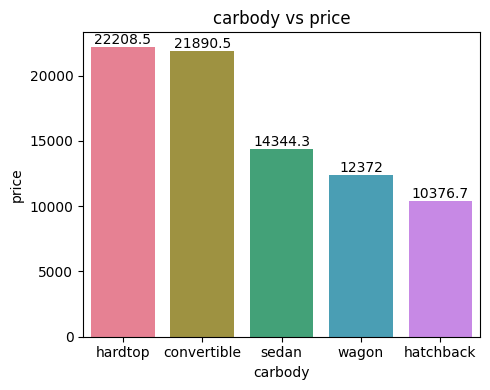

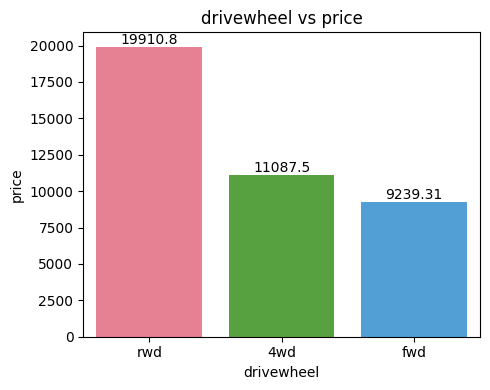

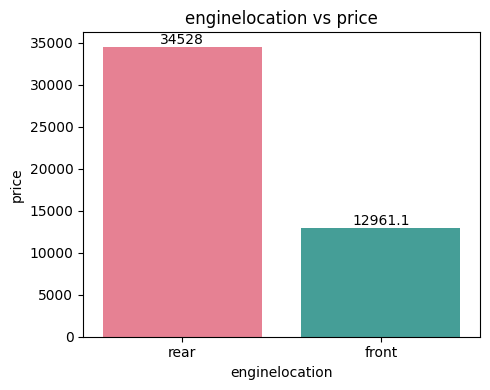

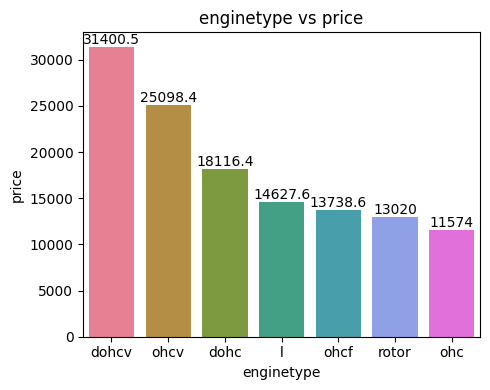

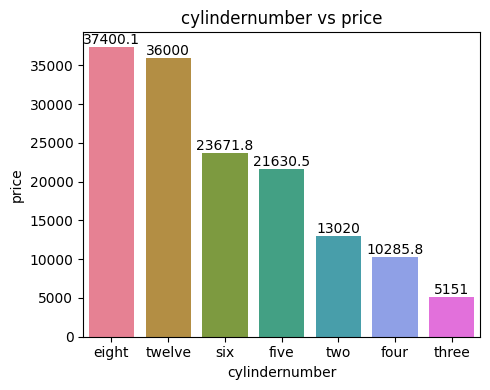

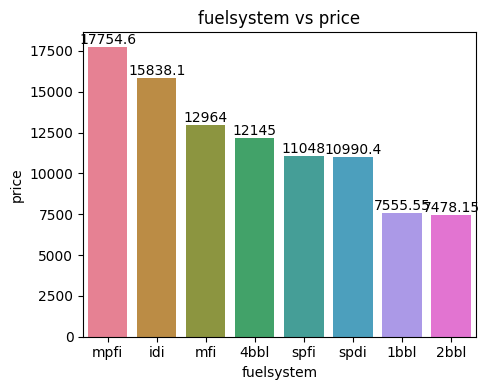

In [123]:
non_numerical_cols_name = np.array(non_numerical_cols.columns)
non_numerical_cols_name = non_numerical_cols_name[non_numerical_cols_name != 'CarName']

for col in non_numerical_cols_name:
    group_by_price = df.groupby(col)['price'].mean().reset_index()
    group_by_price.columns = [col, "price"]
    group_by_price = group_by_price.sort_values(by='price', ascending=False)
  
    plot_bar_diagram(data=group_by_price, x_col=col, y_col='price')

Number of car models repeated = 205-147 = 58

/tmp/ipykernel_265487/896292020.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




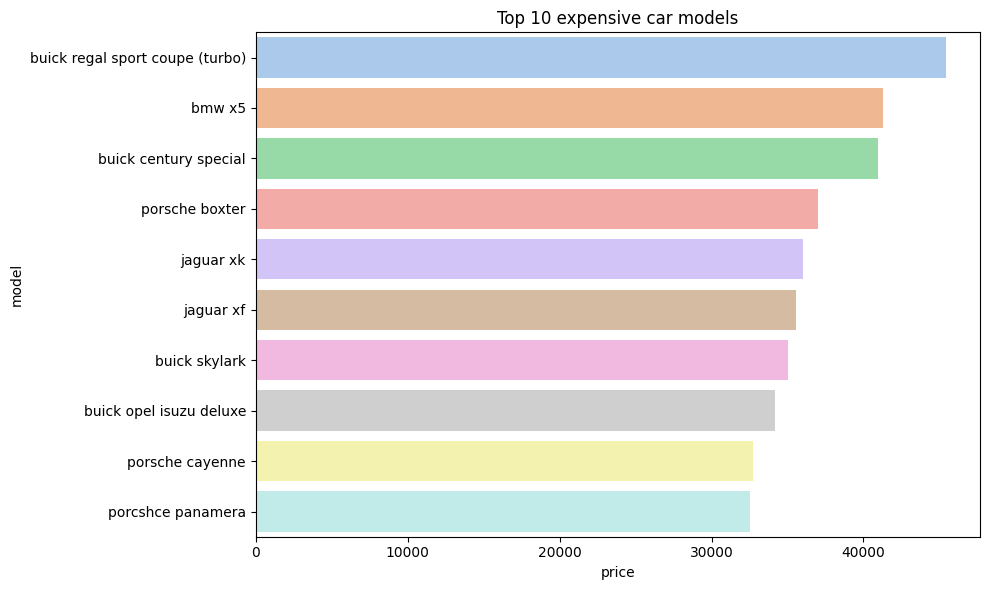

/tmp/ipykernel_265487/896292020.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




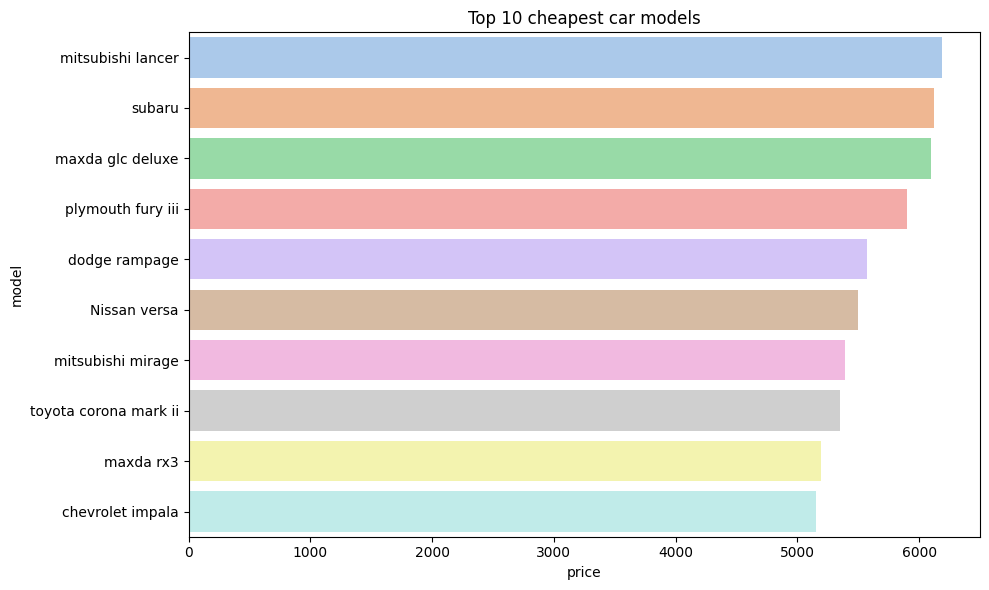

In [124]:
car_models_by_price = df.groupby('CarName')['price'].mean().reset_index()
car_models_by_price.columns =  ['model', 'price']
car_models_by_price = car_models_by_price.sort_values(by='price', ascending=False)
# print(car_models_by_price)

top_10_models_by_price = car_models_by_price.head(10)
plot_car_models(data=top_10_models_by_price, x_col_name="price", y_col_name="model", title="Top 10 expensive car models")
lowest_10_models_by_price = car_models_by_price.tail(10)
plot_car_models(data=lowest_10_models_by_price, x_col_name="price", y_col_name="model", title="Top 10 cheapest car models")

VISUALIZE CAR MODELS BY BRAND

In [125]:
df['brand'] = df['CarName'].str.split().str[0].str.lower()
print("Number of brands=", len(df['brand'].unique()))

Number of brands= 27


/tmp/ipykernel_265487/896292020.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




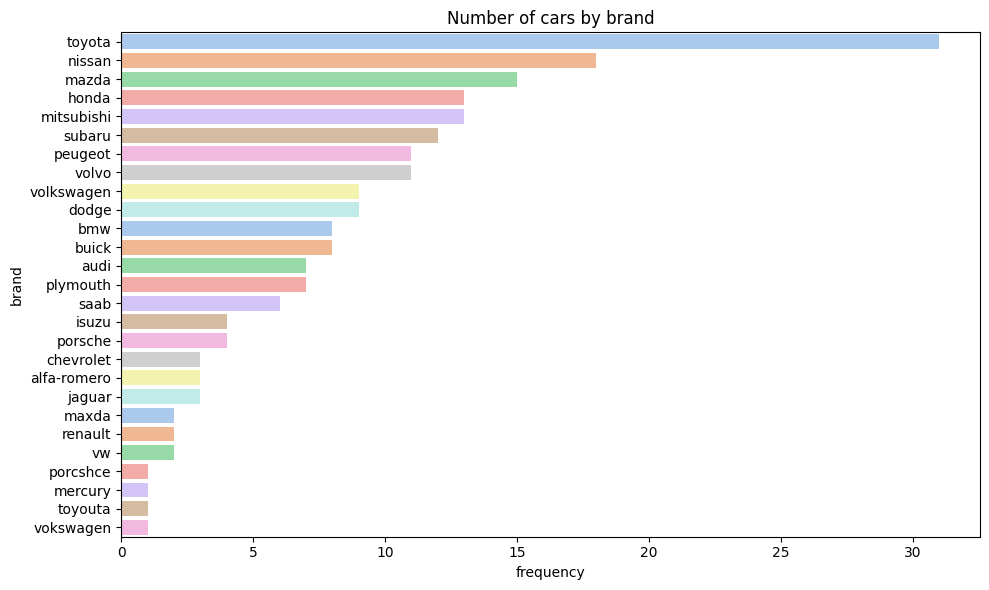

In [126]:
car_models_by_brand = df['brand'].value_counts().reset_index()
car_models_by_brand.columns =  ['brand', 'frequency']
car_models_by_brand = car_models_by_brand.sort_values(by='frequency', ascending=False)

plot_car_models(data=car_models_by_brand, x_col_name="frequency", y_col_name="brand", title="Number of cars by brand")

/tmp/ipykernel_265487/896292020.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




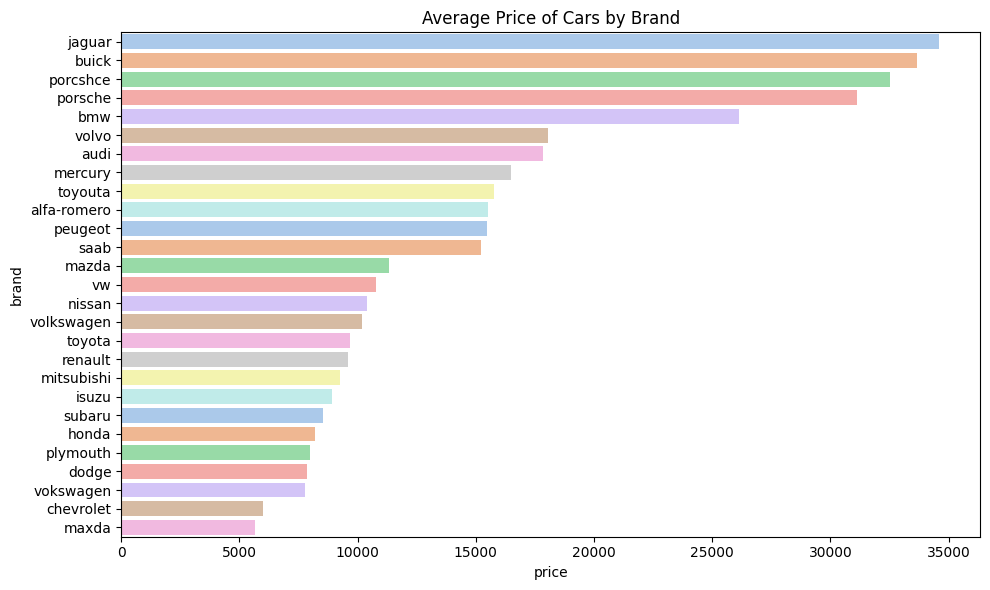

In [127]:
price_by_brand = df.groupby('brand')['price'].mean().reset_index()
price_by_brand.columns =  ['brand', 'price']
price_by_brand = price_by_brand.sort_values(by='price', ascending=False)

plot_car_models(data=price_by_brand, x_col_name="price", y_col_name="brand", title="Average Price of Cars by Brand")


***Correlation among numerical data***

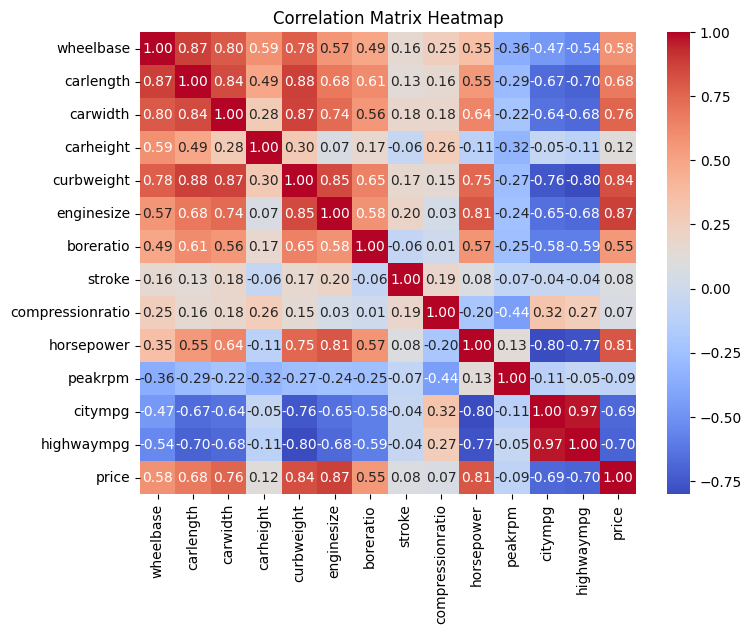

In [128]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,       # show correlation values
            fmt=".2f",        # format to 2 decimals
            cmap="coolwarm",  # color map
            cbar=True)        # show color bar

plt.title("Correlation Matrix Heatmap")
plt.show()

In [129]:
# correlation statistics

corr_matrix = correlation_matrix.abs()

# Take only upper triangle, excluding diagonal
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper = upper.unstack().dropna().sort_values(ascending=False)

print(upper.head(15))

highwaympg  citympg       0.971337
curbweight  carlength     0.877728
carlength   wheelbase     0.874587
price       enginesize    0.874145
curbweight  carwidth      0.867032
enginesize  curbweight    0.850594
carwidth    carlength     0.841118
price       curbweight    0.835305
horsepower  enginesize    0.809769
price       horsepower    0.808139
citympg     horsepower    0.801456
highwaympg  curbweight    0.797465
carwidth    wheelbase     0.795144
curbweight  wheelbase     0.776386
highwaympg  horsepower    0.770544
dtype: float64


In [130]:
print("Highests correlation \n")
print(upper.head(10))

Highests correlation 

highwaympg  citympg       0.971337
curbweight  carlength     0.877728
carlength   wheelbase     0.874587
price       enginesize    0.874145
curbweight  carwidth      0.867032
enginesize  curbweight    0.850594
carwidth    carlength     0.841118
price       curbweight    0.835305
horsepower  enginesize    0.809769
price       horsepower    0.808139
dtype: float64


In [131]:
print("Lowest correlation \n")
print(upper.tail(10))

Lowest correlation 

peakrpm           stroke        0.067964
enginesize        carheight     0.067149
stroke            boreratio     0.055909
                  carheight     0.055307
highwaympg        peakrpm       0.054275
citympg           carheight     0.048640
highwaympg        stroke        0.043931
citympg           stroke        0.042145
compressionratio  enginesize    0.028971
                  boreratio     0.005197
dtype: float64


In [132]:
print("Max correlation:", upper.max())
print("Min correlation:", upper.min())
print("Mean correlation:", upper.mean())

Max correlation: 0.9713370423425045
Min correlation: 0.0051973387005891224
Mean correlation: 0.4354956245089573


# DATA PRE-PROCESSING

In [133]:
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))


In [134]:
categorical_cols = np.array(df.select_dtypes(exclude=['number']).columns)
categorical_cols = np.array([col for col in categorical_cols if col not in ['CarName', 'brand', 'model']])
numerical_cols = np.array(numerical_cols[numerical_cols != 'price'])


print(numerical_cols)
print(categorical_cols)

['wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight' 'enginesize'
 'boreratio' 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg'
 'highwaympg']
['fueltype' 'aspiration' 'doornumber' 'carbody' 'drivewheel'
 'enginelocation' 'enginetype' 'cylindernumber' 'fuelsystem']


apply one hot encoding to the categorical data

In [135]:
print(df.shape)
df_pandas_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int)
X = df_pandas_encoded.drop(columns=['car_ID', 'symboling', 'CarName', 'brand', 'model'], axis=1)
X


(205, 28)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [136]:
y = df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [137]:
X = X.drop(columns=['price'], axis=1)
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi

In [138]:
X.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,...,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,...,0,0,0,0,0,0,0,1,0,0


In [139]:
# standardize the numerical data in X
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,0,0,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,0,0,0,0,0,0,0,1,0,0
5,0.173698,0.264133,0.183272,-0.256354,-0.093502,0.218885,-0.517266,0.462183,-0.414537,0.149133,...,0,0,0,0,0,0,0,1,0,0
6,1.172521,1.515437,2.566488,0.810288,0.555313,0.218885,-0.517266,0.462183,-0.414537,0.149133,...,0,0,0,0,0,0,0,1,0,0
7,1.172521,1.515437,2.566488,0.810288,0.767092,0.218885,-0.517266,0.462183,-0.414537,0.149133,...,0,0,0,0,0,0,0,1,0,0
8,1.172521,1.515437,2.566488,0.892338,1.021227,0.098522,-0.739338,0.462183,-0.465012,0.909635,...,0,0,0,0,0,0,0,1,0,0
9,0.123757,0.337262,0.930947,-0.707626,0.957693,0.098522,-0.739338,0.462183,-0.793101,1.416637,...,0,0,0,0,0,0,0,1,0,0


# MODEL TRAINING

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=369)

In [141]:
X_train.shape, y_train.shape

((164, 51), (164,))

In [142]:
X_test.shape, y_test.shape

((41, 51), (41,))

In [143]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi

In [144]:
reg = LinearRegression().fit(X_train, y_train)

In [145]:
y_pred = reg.predict(X_test)

In [146]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [152]:
def evaluation_metrics(y_test, y_pred):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE  : {mae:.3f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R²   : {r2:.3f}")

In [148]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
106,18399.0,17898.491631,500.508369
178,16558.0,19536.205087,-2978.205087
168,9639.0,14287.280296,-4648.280296
136,18150.0,11149.407174,7000.592826
160,7738.0,8211.547692,-473.547692
37,7895.0,9116.297620,-1221.297620
20,6575.0,6843.243381,-268.243381
94,7299.0,6680.425183,618.574817
201,19045.0,22300.419696,-3255.419696
73,40960.0,43890.293865,-2930.293865


In [185]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    mplcursors.cursor(hover=True)
    plt.show()

MAE  : 2372.204
MSE  : 9240827.690
RMSE : 3039.873
R²   : 0.880


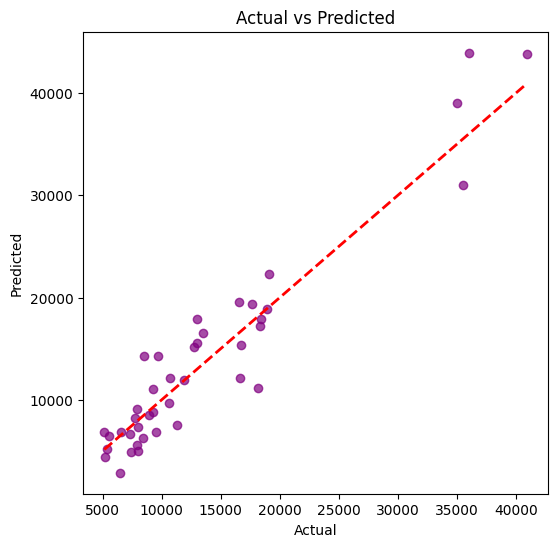

In [186]:
evaluation_metrics(y_test, y_pred)
plot_predictions(y_test, y_pred)

# Stochastic Gradient Descent

In [181]:
sgd_reg = SGDRegressor(
    max_iter=100000,       
    learning_rate='constant',  
    eta0=0.0001,           
    penalty=None,        
    random_state=42
)


In [182]:
sgd_reg.fit(X_train, y_train)

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [183]:
y_pred_sgd = sgd_reg.predict(X_test)

MAE  : 2365.492
MSE  : 10796582.618
RMSE : 3285.815
R²   : 0.860


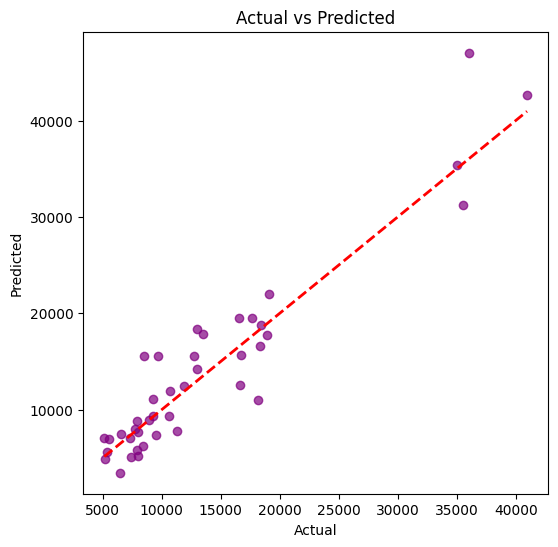

In [187]:
evaluation_metrics(y_test, y_pred_sgd)
plot_predictions(y_test, y_pred_sgd)